In [13]:
import os
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

import csv


In [64]:
with open("StrToNum.txt", "rb") as myFile:
    StrToNum = pickle.load(myFile)
with open("NumToStr.txt", "rb") as myFile:
    NumToStr = pickle.load(myFile)

In [162]:
finalTrainImgData = []
finalClassName = []

In [65]:
def create_dataset_PIL(img_folder):
    
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        print(dir1)
        for file in os.listdir(os.path.join(img_folder, dir1)):       
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH))
            image = image.astype('float32')
            image /= 255  
            img_data_array=np.append(img_data_array,image)
            class_name=np.append(class_name,StrToNum[dir1])
    return img_data_array , class_name

In [178]:
IMG_WIDTH=32
IMG_HEIGHT=32
img_train_folder = 'D:\AIML\Devanagri dataset\DevanagariHandwrittenCharacterDataset\Train\Fifth 10'

In [179]:
PIL_train_img_data, train_class_name=create_dataset_PIL(img_train_folder)

character_31_petchiryakha
character_32_patalosaw
character_33_ha
character_34_chhya
character_35_tra
character_36_gya


In [182]:
print(PIL_train_img_data.shape)
print(train_class_name.shape)
print(np.unique(train_class_name))
#finalTrainImgData=np.append(finalTrainImgData,PIL_train_img_data)
#finalClassName=np.append(finalClassName,train_class_name)
print(finalTrainImgData.shape)
print(finalClassName.shape)
print(np.unique(finalClassName))

(10444800,)
(10200,)
[1. 2. 3. 4. 5. 6.]
(80076800,)
(78200,)
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.]


In [183]:
finalTrainImgData=np.resize(finalTrainImgData,(len(finalClassName),32,32))

In [233]:
print(finalTrainImgData.shape)
finalClassName-=1
print(finalClassName)
finalClassName=finalClassName.astype('int64')
print(np.unique(finalClassName))

(78200, 32, 32)
[6 6 6 ... 5 5 5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [234]:
# save numpy array as npy file
from numpy import asarray
from numpy import save
# define data
# save to npy file
save('finalTrainImgData.npy', finalTrainImgData)
save('finalClassName.npy', finalClassName)

In [235]:
# load numpy array from npy file
from numpy import load
# load array
data = load('finalTrainImgData.npy')
labels = load('finalClassName.npy')
# print the array
print(data.shape)
print(labels.shape)
print(np.unique(labels))

(78200, 32, 32)
(78200,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


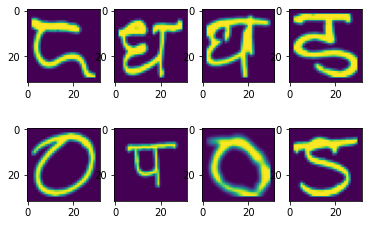

In [236]:
import random
for i in range(8):
  plt.subplot(241+i)
  plt.imshow(data[random.randint(0, 70000)])

In [237]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(32,32)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(46, activation=tf.nn.softmax)])

In [238]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [239]:
model.fit(data, labels , epochs=12)


Epoch 1/12
2444/2444 [==============================] - 4s 1ms/step - loss: 1.0748 - accuracy: 0.7100
Epoch 2/12
2444/2444 [==============================] - 3s 1ms/step - loss: 0.5297 - accuracy: 0.8525
Epoch 3/12
2444/2444 [==============================] - 3s 1ms/step - loss: 0.3800 - accuracy: 0.8918
Epoch 4/12
2444/2444 [==============================] - 4s 1ms/step - loss: 0.3044 - accuracy: 0.9109
Epoch 5/12
2444/2444 [==============================] - 3s 1ms/step - loss: 0.2547 - accuracy: 0.9239
Epoch 6/12
2444/2444 [==============================] - 4s 1ms/step - loss: 0.2221 - accuracy: 0.9332
Epoch 7/12
2444/2444 [==============================] - 4s 2ms/step - loss: 0.1966 - accuracy: 0.9394
Epoch 8/12
2444/2444 [==============================] - 3s 1ms/step - loss: 0.1749 - accuracy: 0.9469
Epoch 9/12
2444/2444 [==============================] - 3s 1ms/step - loss: 0.1563 - accuracy: 0.9514
Epoch 10/12
2444/2444 [==============================] - 3s 1ms/step - loss: 0.140

33534
35
35
50544
45
45
66244
24
24
20408
28
28
46384
43
43


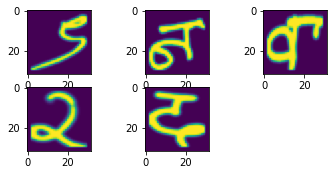

In [240]:
prediction=model.predict(data)
for i in range(5):
    r=random.randint(0,70000)
    print(r)
    print(np.argmax(prediction[r]))
    plt.subplot(331+i)
    plt.imshow(data[r])
    print(labels[r])

In [241]:
print(model.evaluate(data,labels))

2444/2444 [==============================] - 3s 1ms/step - loss: 0.1014 - accuracy: 0.9671
[0.10144361108541489, 0.9671483635902405]


In [242]:
# load numpy array from npy file
from numpy import load
# load array
testData = load('finalTestImgData.npy')
testLabels = load('finalTestClassName.npy')
# print the array
print(testData.shape)
print(testLabels.shape)
print(np.unique(testLabels))

(13800, 32, 32)
(13800,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


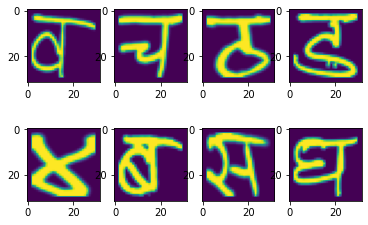

In [243]:
import random
for i in range(8):
  plt.subplot(241+i)
  plt.imshow(testData[random.randint(0, 13800)])

character_23_ba
character_23_ba
character_16_tabala
character_16_tabala
digit_4
digit_4
digit_5
digit_5
character_10_yna
character_10_yna


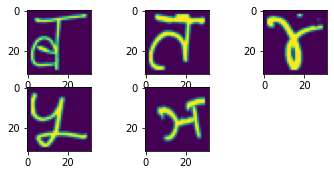

In [303]:
prediction=model.predict(testData)
for i in range(5):
    r=random.randint(0,13800)
    #r=i+0
    print(NumToStr[np.argmax(prediction[r])])
    print(NumToStr[testLabels[r]])
    plt.subplot(331+i)
    plt.imshow(testData[r])

In [268]:
print(model.evaluate(testData,testLabels))

432/432 [==============================] - 0s 976us/step - loss: 0.3647 - accuracy: 0.9102
[0.3646993041038513, 0.9102174043655396]


In [262]:
countRight=0
countWrong=0
wrongDict={}
wrongList=[]
rightList=[]

for i in range(46):
    wrongDict[i]=0

prediction=model.predict(testData)
print(type(prediction))
print(prediction.shape)

for r in range(10):
    if(np.argmax(prediction[r])==testLabels[r]):
        print("Right one")
        print(np.argmax(prediction[r]))
        print(testLabels[r])
        countRight+=1
        rightList.append(r)
    else:
        print("Wrong one")
        print(np.argmax(prediction[r]))
        print(testLabels[r])
        countWrong+=1
        wrongList.append(r)
        wrongDict[testLabels[r]]+=1
print(countRight)
print(countWrong)
print(countRight/(countRight+countWrong))

#print(wrongDict)
print(wrongList)
print(rightList)

<class 'numpy.ndarray'>
(13800, 46)
Right one
7
7
Right one
7
7
Right one
7
7
Right one
7
7
Right one
7
7
Right one
7
7
Right one
7
7
Right one
7
7
Right one
7
7
Right one
7
7
10
0
1.0
[]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [277]:
print(NumToStr[10])
print(NumToStr[9])
print(NumToStr[35])

character_3_ga
character_2_kha
digit_8


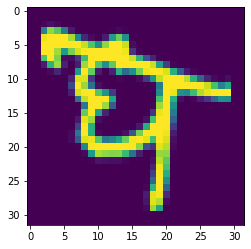

In [273]:
    plt.imshow(data[7510])